In [ ]:
import pandas as pd
import numpy as np

# Load the first dataset
historical_data = pd.read_csv(r"C:\Users\SAURABH\Downloads\historical_data.csv")
print(historical_data)

# Display information about the dataset
print(historical_data.info())

                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size U

In [39]:
historical_data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')

In [34]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00,2024-12-02


In [35]:
historical_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.00,211224.00,211224.00,211224.00,211224.00,211224.00,211224.00,211224.00,211224.00
mean,11414.72,4623.36,5639.45,-29946.25,48.75,69653876008.97,1.16,562854854500788.50,1737744290421.54
std,29447.65,104272.89,36575.14,673807.42,919.16,18357525271.93,6.76,325756470346550.31,8689920301.57
min,0.00,0.00,0.00,-14334629.00,-117990.10,173271100.00,-1.18,0.00,1680000000000.00
25%,4.85,2.94,193.79,-376.23,0.00,59838527992.75,0.02,281000000000000.00,1740000000000.00
50%,18.28,32.00,597.05,84.72,0.00,74429390066.00,0.09,562000000000000.00,1740000000000.00
75%,101.58,187.90,2058.96,9337.28,5.79,83355430544.00,0.39,846000000000000.00,1740000000000.00
max,109004.00,15822438.00,3921430.72,30509482.00,135329.09,90149230487.00,837.47,1130000000000000.00,1750000000000.00


In [ ]:
#check for missing values
historical_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

In [37]:
#Load the second dataset
sentiment_data = pd.read_csv(r"C:\Users\SAURABH\Downloads\fear_greed_index.csv")
print(sentiment_data)

       timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]


In [ ]:
#checking information about the dataset
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [40]:
sentiment_data.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [41]:
sentiment_data.describe()

,timestamp,value
count,2644.00,2644.00
mean,1631898885.02,46.98
std,65979674.32,21.83
min,1517463000.00,5.00
25%,1574811000.00,28.00
50%,1631899800.00,46.00
75%,1688988600.00,66.00
max,1746163800.00,95.00


In [ ]:
#check for missing values
sentiment_data.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [43]:
# Get float columns
float_cols = historical_data.select_dtypes(include=['float64']).columns

# Round float columns to 2 decimal places
historical_data[float_cols] = historical_data[float_cols].round(2)

# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [44]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00,2024-12-02


In [46]:
# Convert 'date' columns to date only
historical_data['date'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True).dt.date
sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date
print(historical_data['date'])
print(sentiment_data['date'])

0         2024-12-02
1         2024-12-02
2         2024-12-02
3         2024-12-02
4         2024-12-02
             ...    
211219    2025-04-25
211220    2025-04-25
211221    2025-04-25
211222    2025-04-25
211223    2025-04-25
Name: date, Length: 211224, dtype: object
0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object


In [48]:
# Merge datasets on 'date' column
merged_data = pd.merge(historical_data, sentiment_data, on='date', how='left')
print(merged_data)

                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107             7.98   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107             7.98   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107             7.99   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107             7.99   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107             7.99   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN             1.10   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN             1.10   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN             1.10   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN             1.10   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN             1.10   

        Size Tokens  Size U

In [14]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed


In [15]:
# Total Closed PnL, Average Closed PnL, Total Size USD, Proportion of BUY Trades per Sentiment Type
total_pnl_per_sentiment = merged_data.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': 'sum',
    'Side': lambda x: (x == 'BUY').sum()/len(x)
    }).reset_index()

total_pnl_per_sentiment.columns = ['Sentiment', 'Total Closed PnL', 'Average Closed PnL', 'Total Size USD', 'Proportion of BUY Trades']

print("Total PnL per Sentiment Type:\n", total_pnl_per_sentiment)

Total PnL per Sentiment Type:
        Sentiment  Total Closed PnL  Average Closed PnL  Total Size USD  \
0   Extreme Fear         739109.83               34.54    114484261.44   
1  Extreme Greed        2715171.47               67.89    124465164.57   
2           Fear        3357155.11               54.29    483324789.79   
3          Greed        2150130.56               42.74    288582494.72   
4        Neutral        1292921.70               34.31    180242063.08   

   Proportion of BUY Trades  
0                      0.51  
1                      0.45  
2                      0.49  
3                      0.49  
4                      0.50  


In [16]:
# Win Rate by Sentiment Type
win_rate = merged_data.groupby('classification').apply(lambda x: (x['Closed PnL'] > 0).sum() / len(x)).reset_index(name='Win Rate')
print("Win Rate by Sentiment Type:\n", win_rate)

Win Rate by Sentiment Type:
   classification  Win Rate
0   Extreme Fear      0.37
1  Extreme Greed      0.46
2           Fear      0.42
3          Greed      0.38
4        Neutral      0.40


In [17]:
# Average Trade Size per Sentiment Type
avg_trade_size = merged_data.groupby('classification')['Size USD'].mean().reset_index(name='Average Trade Size USD')
print("Average Trade Size per Sentiment Type:\n", avg_trade_size)

Average Trade Size per Sentiment Type:
   classification  Average Trade Size USD
0   Extreme Fear                 5349.73
1  Extreme Greed                 3112.25
2           Fear                 7816.11
3          Greed                 5736.88
4        Neutral                 4782.73


In [18]:
# liquidation / auto-deleveraging count
# Get which sentiment types cause forced exits
liquidations = merged_data[
    merged_data['Direction'].str.contains('Liquidated|Auto-Deleveraging', na=False)
].groupby('classification').size().reset_index(name='Liquidation/AD Count')

print("Liquidation/Auto-Deleveraging Count by Sentiment Type:\n", liquidations)

Liquidation/Auto-Deleveraging Count by Sentiment Type:
   classification  Liquidation/AD Count
0          Greed                     9


In [19]:
# numerical correlation between sentiment value and PnL
correlation = merged_data['value'].corr(merged_data['Closed PnL'])
print(f"Correlation between Sentiment Value and Closed PnL: {correlation:.2f}")

Correlation between Sentiment Value and Closed PnL: 0.01


In [20]:

# Profitability Distribution by Sentiment Type
# Aggregate Closed PnL by sentiment:
# Total profit/loss per sentiment type.
# Average profit per trade per sentiment.
# Insight: You might find traders perform better in certain market moods (e.g., Fear vs Greed).
profitability_stats = merged_data.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'std', 'count']).reset_index()
print("Profitability Statistics by Sentiment Type:\n", profitability_stats)


Profitability Statistics by Sentiment Type:
   classification        sum  mean     std  count
0   Extreme Fear  739109.83 34.54 1136.06  21400
1  Extreme Greed 2715171.47 67.89  766.83  39992
2           Fear 3357155.11 54.29  935.36  61837
3          Greed 2150130.56 42.74 1116.03  50303
4        Neutral 1292921.70 34.31  517.12  37686


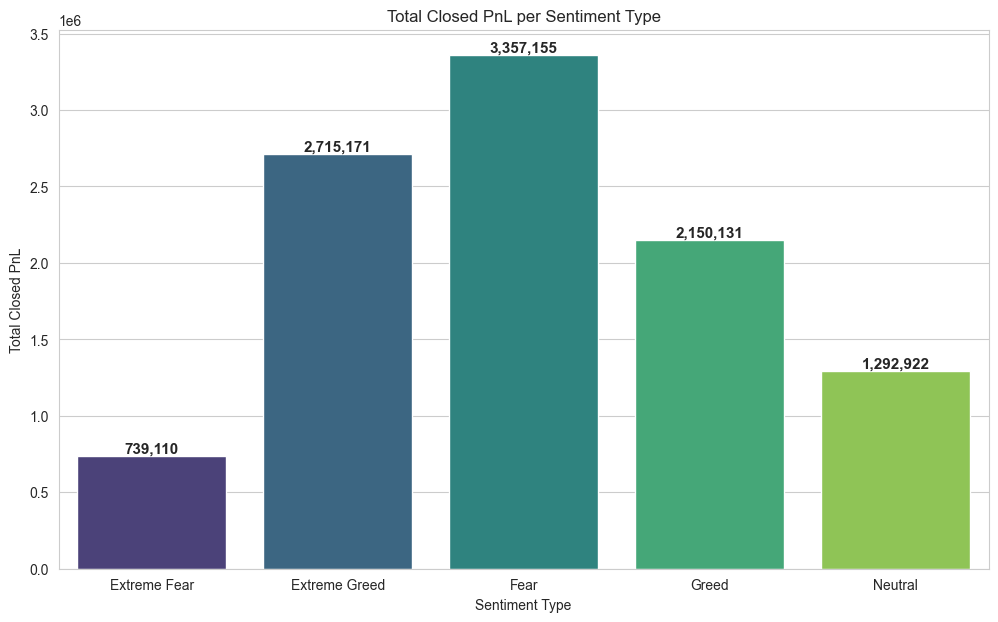

In [21]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
    
# Bar plot for Total Closed PnL per Sentiment Type
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=total_pnl_per_sentiment, 
    x='Sentiment', 
    y='Total Closed PnL', 
    hue='Sentiment', 
    dodge=False,      
    palette='viridis'
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )


plt.title('Total Closed PnL per Sentiment Type')
plt.ylabel('Total Closed PnL')  
plt.xlabel('Sentiment Type')
plt.show()

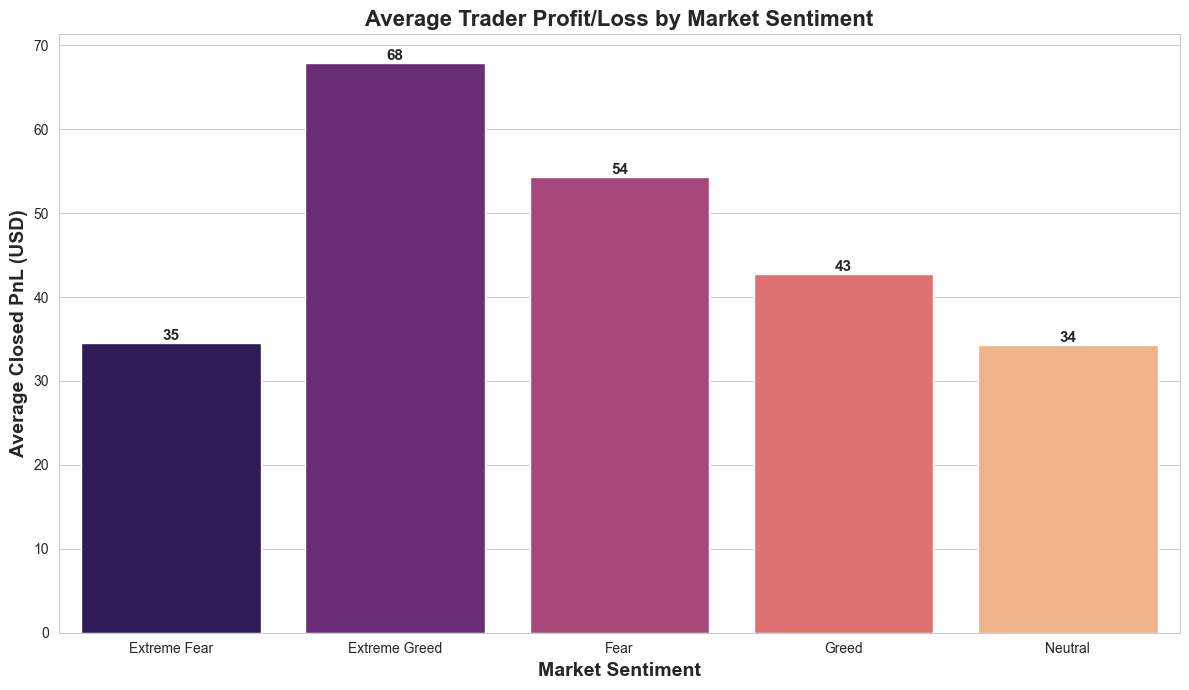

In [52]:
# Bar plot for Average Closed PnL per Sentiment Type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=total_pnl_per_sentiment,
    x='Sentiment',
    y='Average Closed PnL',
    palette='magma',
    hue='Sentiment',
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title("Average Trader Profit/Loss by Market Sentiment",
          fontsize=16, fontweight='bold')
plt.xlabel("Market Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Average Closed PnL (USD)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


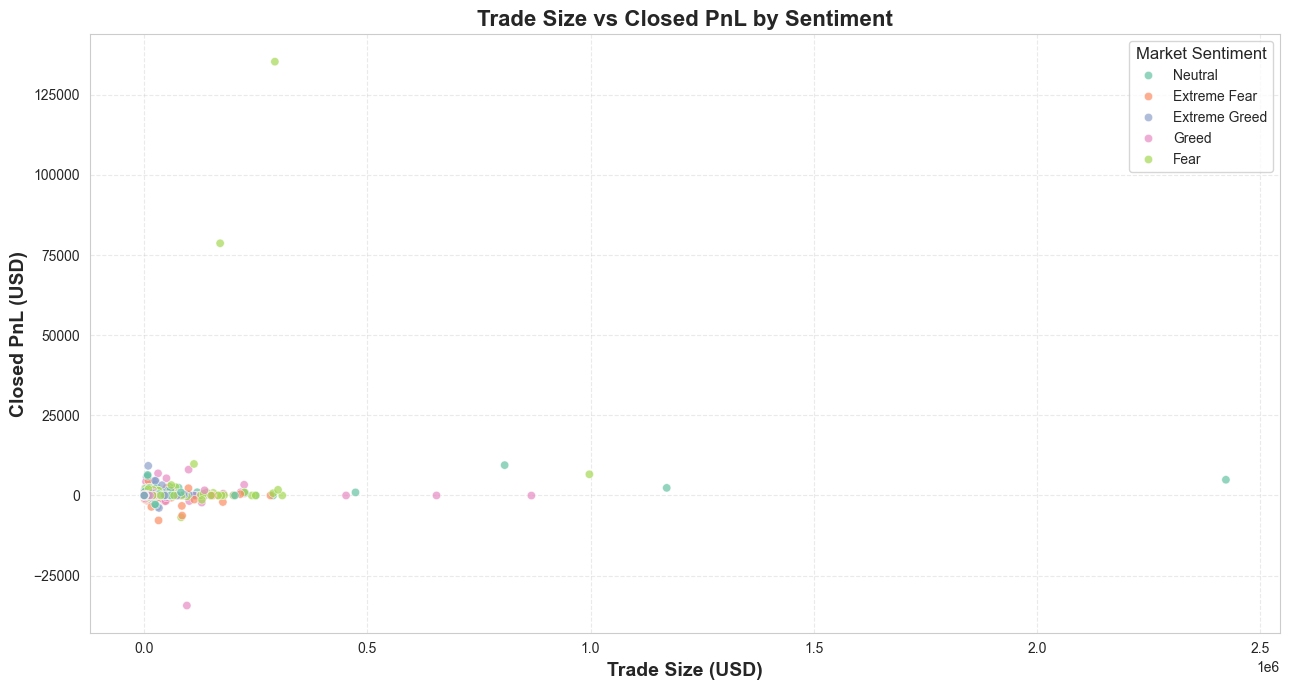

In [ ]:
# scatter: trade size vs closed pnl colored by sentiment
plt.figure(figsize=(13,7))
sns.scatterplot(
    data=merged_data.sample(8000),  
    x='Size USD', 
    y='Closed PnL', 
    hue='classification', 
    palette='Set2',
    alpha=0.7,
)

plt.title('Trade Size vs Closed PnL by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Trade Size (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Closed PnL (USD)', fontsize=14, fontweight='bold')
plt.legend(title='Market Sentiment', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

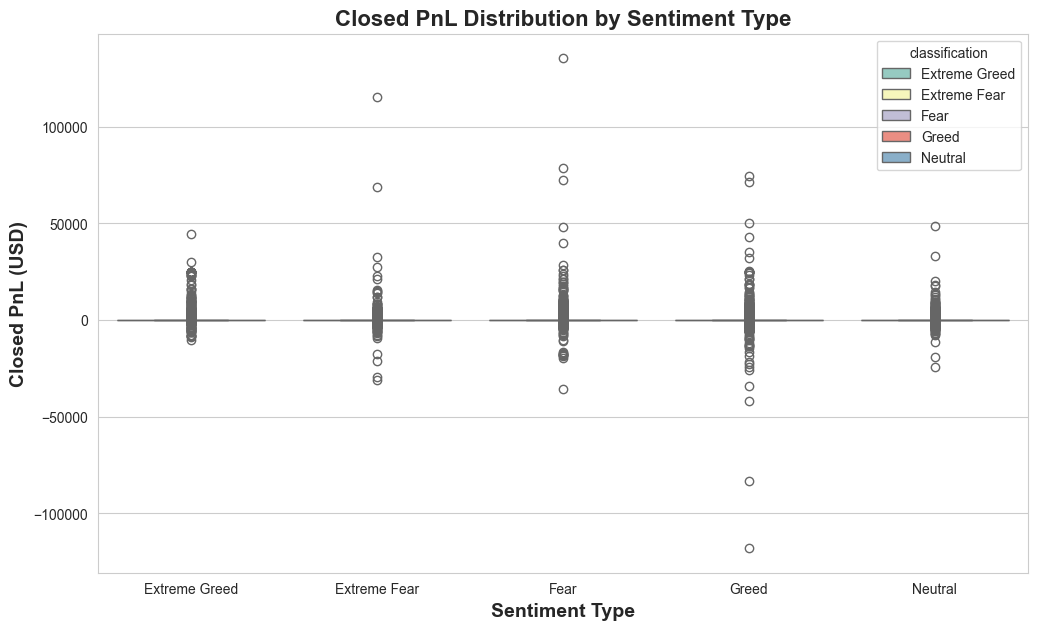

In [54]:
# Profit distribution per sentiment type
plt.figure(figsize=(12,7))
sns.boxplot(
    data=merged_data, 
    x='classification', 
    y='Closed PnL', 
    palette='Set3',
    hue='classification'
)
plt.title('Closed PnL Distribution by Sentiment Type', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Type', fontsize=14, fontweight='bold')
plt.ylabel('Closed PnL (USD)', fontsize=14, fontweight='bold') 
plt.show()

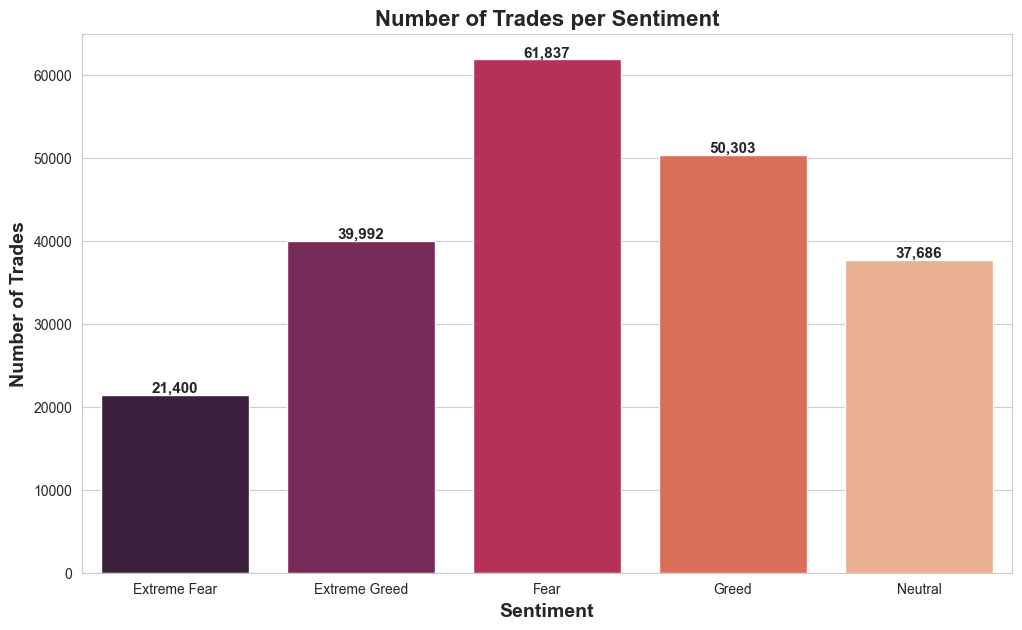

In [57]:
# Trade count per sentiment type
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")


trade_count = merged_data.groupby('classification')['Account'].count().reset_index()
ax = sns.barplot(data=trade_count, x='classification', y='Account', palette='rocket', hue='classification')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Number of Trades per Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Number of Trades', fontsize=14, fontweight='bold')
plt.show()


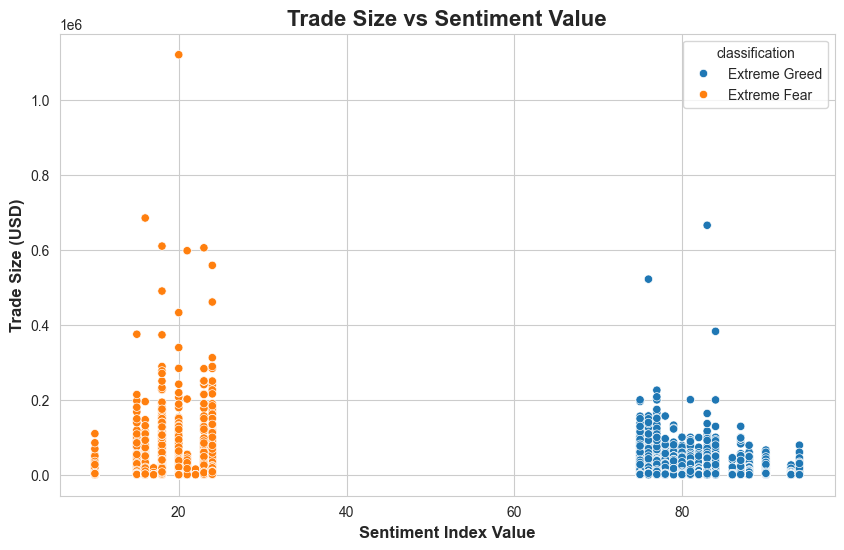

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only extreme sentiments
extreme_sentiments = merged_data[
    merged_data['classification'].isin(['Extreme Fear', 'Extreme Greed'])
]

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=extreme_sentiments,
    x='value',
    y='Size USD',
    hue='classification'
)

plt.title("Trade Size vs Sentiment Value", fontsize=16, fontweight="bold")
plt.xlabel("Sentiment Index Value", fontsize=12, fontweight="bold")
plt.ylabel("Trade Size (USD)", fontsize=12, fontweight="bold")

plt.show()


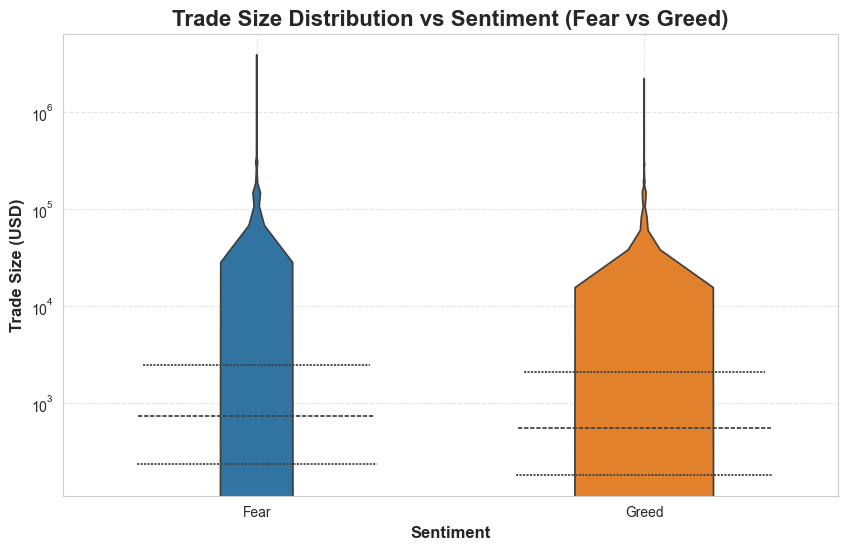

In [ ]:
#Trade size vs sentiment value for Fear and Greed sentiments
import matplotlib.pyplot as plt
import seaborn as sns

# Filter extreme sentiments
fearAndGreed = merged_data[merged_data['classification'].isin(['Fear', 'Greed'])]

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Violin plot: Trade Size vs Sentiment
sns.violinplot(
    data=fearAndGreed,
    x='classification',
    y='Size USD',
    hue='classification',
    legend=False,
    palette={'Fear':'#1f77b4', 'Greed':'#ff7f0e'},
    inner='quartile'  
)

# Titles and labels
plt.title('Trade Size Distribution vs Sentiment (Fear vs Greed)', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12, fontweight='bold')
plt.ylabel('Trade Size (USD)', fontsize=12, fontweight='bold')
plt.yscale('log')  
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



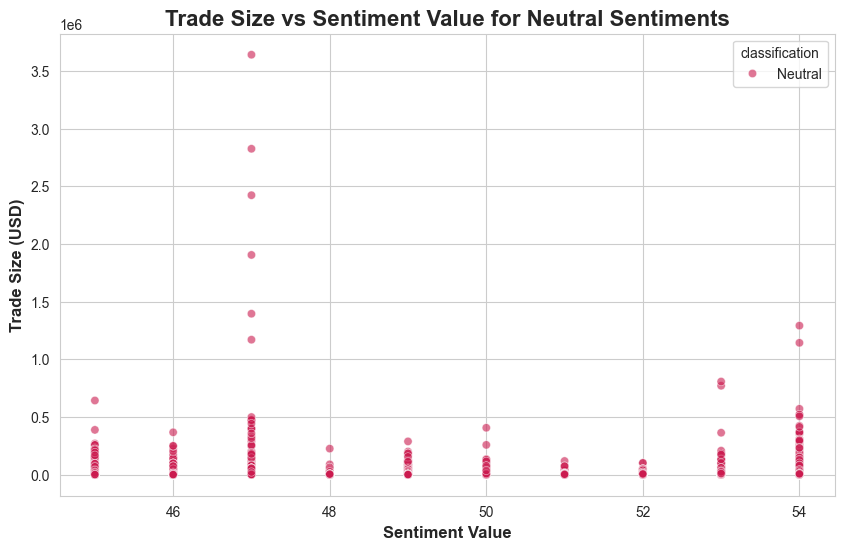

In [69]:
# Trade size vs sentiment value for Neutral sentiments
neutral_sentiments = merged_data[merged_data['classification'].isin(['Neutral'])]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=neutral_sentiments, 
    x='value', 
    y='Size USD', 
    hue='classification', 
    palette='rocket',
    alpha=0.6
)
plt.title('Trade Size vs Sentiment Value for Neutral Sentiments', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Value', fontsize=12, fontweight='bold')
plt.ylabel('Trade Size (USD)', fontsize=12, fontweight='bold')
plt.show()

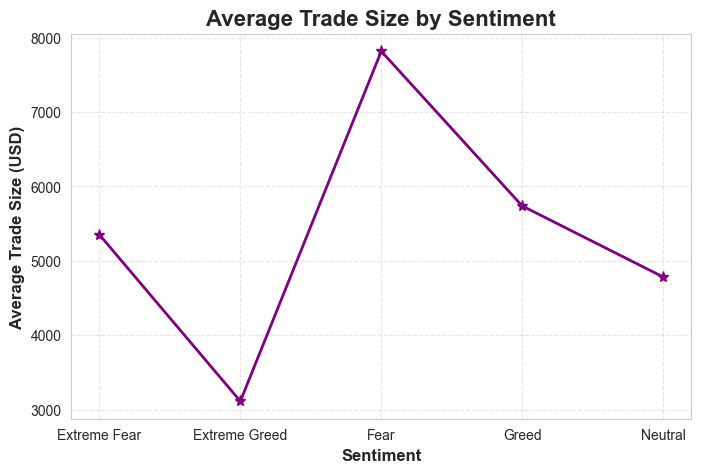

In [ ]:
import matplotlib.pyplot as plt

# Aggregate average trade size by sentiment
agg_size = merged_data.groupby('classification')['Size USD'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))

# Line plot
plt.plot(
    agg_size['classification'], 
    agg_size['Size USD'], 
    marker='*',      
    linewidth=2, 
    markersize=8, 
    color='purple'
)

# Titles and labels
plt.title('Average Trade Size by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12, fontweight='bold')
plt.ylabel('Average Trade Size (USD)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


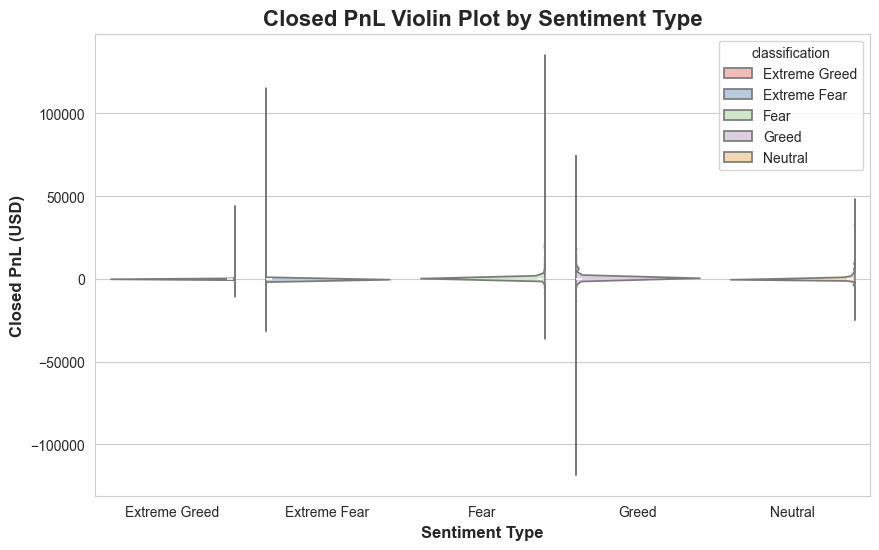

In [76]:
# Profitability Distribution by Sentiment Type
plt.figure(figsize=(10,6))
sns.violinplot(
    data=merged_data, 
    x='classification', 
    y='Closed PnL', 
    palette='Pastel1',
    hue='classification',
    split=True
)
plt.title('Closed PnL Violin Plot by Sentiment Type', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Type', fontsize=12, fontweight='bold')
plt.ylabel('Closed PnL (USD)', fontsize=12, fontweight='bold')
plt.show()


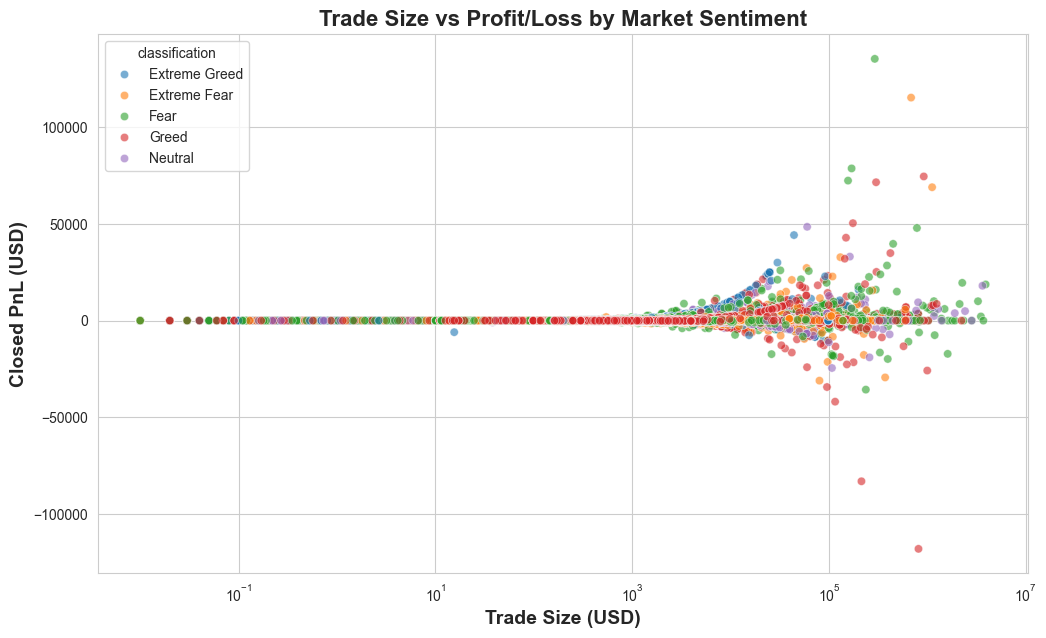

In [ ]:
# scatter: trade size vs closed pnl colored by sentiment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.scatterplot(
    data=merged_data,
    x='Size USD',
    y='Closed PnL',
    hue='classification',
    alpha=0.6
)
plt.xscale('log')
plt.title("Trade Size vs Profit/Loss by Market Sentiment", fontsize=16, fontweight='bold')
plt.xlabel("Trade Size (USD)", fontsize=14, fontweight='bold')
plt.ylabel("Closed PnL (USD)", fontsize=14, fontweight='bold')
plt.show()


In [32]:
merged = merged_data.to_csv("merged_trader_sentiment.csv", index=False)